In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imblearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, RFECV, mutual_info_classif, mutual_info_regression, SelectPercentile
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from __future__ import print_function
import sys
import cv2 as cv

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn


import warnings; warnings.simplefilter('ignore')

%matplotlib inline


In [139]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

# Data Preprocessing
Introduce the Data¶

Task: Given EEG series, predict wheiter they have Epileptic-Seizure or not

In [140]:
df = pd.read_csv('data.csv')

df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


Binary Classification

In [141]:
cols = df.columns
outcome = df.y
outcome[outcome>1]=0
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


Outcome Plot

O número de testes para a classe sem crises é: 9200
O número de testes para a classe com crises é: 2300


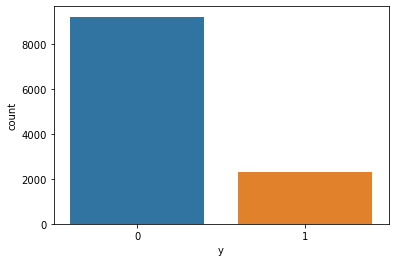

In [142]:
ax = sn.countplot(outcome,label="Count")
non_seizure, seizure = outcome.value_counts()
print('O número de testes para a classe sem crises é:', non_seizure)
print('O número de testes para a classe com crises é:', seizure)

Pandas Indexation

In [143]:
X = df.iloc[:,1:179].values
X.shape

(11500, 178)

In [144]:
y = df.iloc[:,179].values
y

array([0, 1, 0, ..., 0, 0, 0])

# Feature election and model building

   ## Splitting the dataset into the Training set and Test set

In [147]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [148]:
#Classificadores
modelos = []
modelos.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
modelos.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
modelos.append(('K-Nearest Neighbors', KNeighborsClassifier()))
modelos.append(('Classification and Regression Trees', DecisionTreeClassifier()))
modelos.append(('Gaussian Naive Bayes', GaussianNB()))
modelos.append(('Linear Support Vector Machines', svm.LinearSVC()))
modelos.append(('Extra Trees Classifier',ExtraTreesClassifier()))

In [149]:
resultados = []
nomes = []
for nome, modelo in modelos:
	resultado_validacao_cruzada = cross_val_score(modelo, X_train, y_train, cv=kfold, scoring='accuracy')
	resultados.append(resultado_validacao_cruzada)
	nomes.append(nome)
	print('%s: %f (%f)' % (nome, resultado_validacao_cruzada.mean(), resultado_validacao_cruzada.std()))

Logistic Regression: 0.823727 (0.005943)
Linear Discriminant Analysis: 0.820621 (0.004753)
K-Nearest Neighbors: 0.918634 (0.007723)
Classification and Regression Trees: 0.937267 (0.005860)
Gaussian Naive Bayes: 0.956025 (0.006578)
Linear Support Vector Machines: 0.832795 (0.015774)
Extra Trees Classifier: 0.971429 (0.005443)


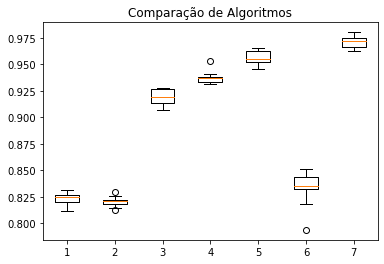

In [150]:
box1 = plt.boxplot(resultados)
plt.title('Comparação de Algoritmos')
plt.show()

In [151]:
predicao = []
for nome, modelo in modelos:
    modelo.fit(X_train,y_train)
    predicao.append(modelo.predict(X_test))

In [152]:
for i in range(len(predicao)):
    print(nomes[i])
    print(accuracy_score(y_test,predicao[i]))
    print(confusion_matrix(y_test,predicao[i]))
    print(classification_report(y_test,predicao[i]))

Logistic Regression
0.8266666666666667
[[2763   15]
 [ 583   89]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2778
           1       0.86      0.13      0.23       672

    accuracy                           0.83      3450
   macro avg       0.84      0.56      0.57      3450
weighted avg       0.83      0.83      0.77      3450

Linear Discriminant Analysis
0.8260869565217391
[[2771    7]
 [ 593   79]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2778
           1       0.92      0.12      0.21       672

    accuracy                           0.83      3450
   macro avg       0.87      0.56      0.56      3450
weighted avg       0.84      0.83      0.77      3450

K-Nearest Neighbors
0.9249275362318841
[[2771    7]
 [ 252  420]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2778
           1       0.98      0

# Metodo com sklearn preprocessing

In [163]:
from sklearn import preprocessing

In [164]:
xteste = preprocessing.scale(X)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(xteste, y, test_size = 0.1)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
resultados2 = []
nomes2 = []
for nome, modelo in modelos:
    resultado_validacao_cruzada = cross_val_score(modelo, X_train2, y_train2, cv=kfold, scoring='accuracy')
    resultados2.append(resultado_validacao_cruzada)
    nomes2.append(nome)
    print('%s: %f (%f)' % (nome, resultado_validacao_cruzada.mean(), resultado_validacao_cruzada.std()))

In [ ]:
plt.boxplot(resultados2)
plt.title('Comparação de Algoritmos')
plt.show()

In [ ]:
predicao2 = []
for nome, modelo in modelos:
    modelo.fit(X_train2,y_train2)
    predicao2.append(modelo.predict(X_test2))

In [ ]:
for i in range(len(predicao2)):
    print(nomes2[i])
    print(accuracy_score(y_test2,predicao2[i]))
    print(confusion_matrix(y_test2,predicao2[i]))
    print(classification_report(y_test2,predicao2[i]))

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2);
ax1.boxplot(resultados);
ax2.boxplot(resultados2);

# Metodo SmoteTomek

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_sample(X, y)


In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_smt, y_smt, test_size = 0.1)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
resultados3 = []
nomes3 = []
for nome, modelo in modelos:
    resultado_validacao_cruzada = cross_val_score(modelo, X_train3, y_train3, cv=kfold, scoring='accuracy')
    resultados3.append(resultado_validacao_cruzada)
    nomes3.append(nome)
    print('%s: %f (%f)' % (nome, resultado_validacao_cruzada.mean(), resultado_validacao_cruzada.std()))

In [ ]:
plt.boxplot(resultados3)
plt.title('Comparação de Algoritmos')
plt.show()

In [ ]:
predicao3 = []
for nome, modelo in modelos:
    modelo.fit(X_train3,y_train3)
    predicao3.append(modelo.predict(X_test3))

In [ ]:
for i in range(len(predicao3)):
    print(nomes3[i])
    print(accuracy_score(y_test3,predicao3[i]))
    print(confusion_matrix(y_test3,predicao3[i]))
    print(classification_report(y_test3,predicao3[i]))

Aplicação Metodo no dataset original

In [ ]:
predicao4 = []
for nome, modelo in modelos:
    modelo.fit(X_train3,y_train3)
    predicao4.append(modelo.predict(X_test))

In [ ]:
for i in range(len(predicao4)):
    print(nomes3[i])
    print(accuracy_score(y_test,predicao4[i]))
    print(confusion_matrix(y_test,predicao4[i]))
    print(classification_report(y_test,predicao4[i]))

In [ ]:
conf_mat = confusion_matrix(y_test,predicao4[i])
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
plot_2d_space(X_smt,y_smt)

# Metodo RandomUnderSampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority')

X_rus, y_rus = rus.fit_sample(X, y)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

The number of trials for the non-seizure class is: 2300
The number of trials for the seizure class is: 2300


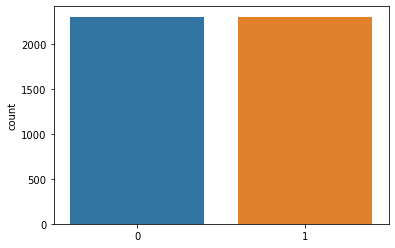

In [162]:
axn = sn.countplot(y_rus,label="Count")
non_seizure = list(y_rus).count(0)
seizure = list(y_rus).count(1)
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_rus, y_rus, test_size = 0.1)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# Metodo Tomeklink

In [ ]:
from matplotlib import pyplot as plt
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='auto')
X_tl, y_tl = tl.fit_sample(X, y)

plot_2d_space(X_tl,y_tl, 'Tomek links under-sampling')